In [1]:
from dl1_data_handler.reader import DLWaveformReader, DLDataReader, TableQualityQuery, DLRawTriggerReader
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import EventSource
from ctapipe.visualization import CameraDisplay
from ctapipe.core.traits import List

from ctapipe.core import QualityQuery

from pathlib import Path

# Por defecto saca la r0 de la cámara completa

In [2]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          sequence_length = 6,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          #output_settings= "waveform",
                          allowed_tels = [1],
                          quality_cuts = False)

In [3]:
description = reader.example_identifiers
for pos, desc in enumerate(description):
     print(f"{pos}:{desc}")
     break

0:index file_index table_index obs_id tel_type_id event_id tel_id    true_energy         true_alt          true_az       true_shower_primary_id spherical_offset_az spherical_offset_alt angular_separation  log_true_energy   true_shower_primary_class
                                                                       TeV               deg               deg                                        deg                 deg                 deg                TeV                                  
----- ---------- ----------- ------ ----------- -------- ------ ----------------- ----------------- ------------------ ---------------------- ------------------- -------------------- ------------------ ------------------ -------------------------
    0          0           0      4           0      100      1 5.560657024383545 62.91127418072167 163.72799455674974                    101  -7.372532050692125   -6.100065092115785  9.558204415118668 0.7451261090651803                         1


In [4]:
reader._get_n_events()

10000

In [5]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5,6,7,8])

<Table length=9>
index file_index table_index ...  log_true_energy   true_shower_primary_class
                             ...        TeV                                  
int64   int64       int64    ...      float64                 int64          
----- ---------- ----------- ... ------------------ -------------------------
    0          0           0 ... 0.7451261090651803                         1
    1          0           1 ... 0.7451261090651803                         1
    2          0           2 ... 0.7451261090651803                         1
    3          0           3 ... 0.7451261090651803                         1
    4          0           4 ... 0.7451261090651803                         1
    5          0           5 ... 0.7451261090651803                         1
    6          0           6 ... 0.7451261090651803                         1
    7          0           7 ... 0.7451261090651803                         1
    8          0           8 ... 0.7451261090651803                         1

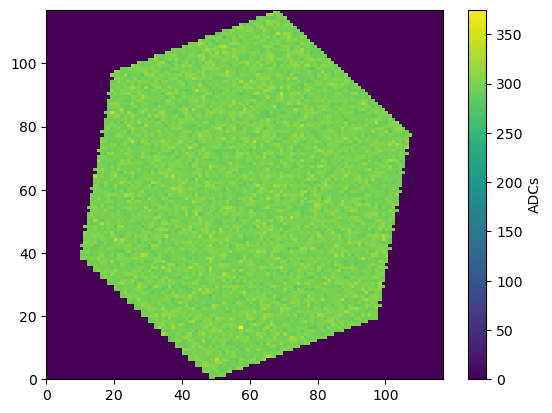

In [6]:
waveform = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5])['features'][1]
plt.figure()
plt.pcolor(waveform[:,:,5],cmap='viridis')
plt.colorbar(label="ADCs")
plt.show()
plt.close()

# One random patch (0.5 prob p.e. < nsb_threshold)

In [7]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "random_patch",
                          number_of_trigger_patches = 7,
                          sequence_length = 75,
                          nsb_threshold = 0,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)

In [8]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,500])


True
True
True
False
True


<Table length=5>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
    0          0           0 ...  0.7451261090651803                         1
    1          0           1 ...  0.7451261090651803                         1
    2          0           2 ...  0.7451261090651803                         1
    3          0           3 ...  0.7451261090651803                         1
  500          0         500 ... -1.8273740283322397                         1

True
False
True
True
cherenkov_pe
------------
           0
          31
           0
           0


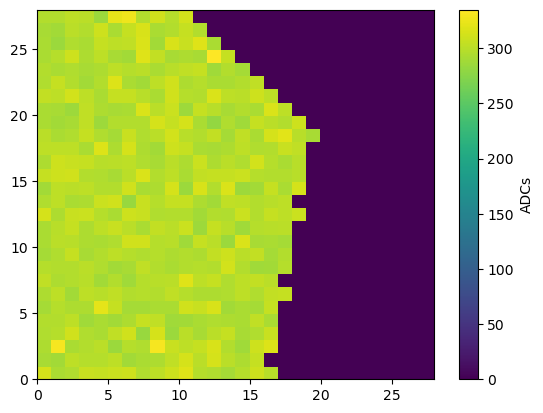

In [9]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "random_patch",
                          number_of_trigger_patches = 7,
                          sequence_length = 75,
                          nsb_threshold = 0,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)
batch = reader.generate_mono_batch(batch_indices=[0,1,2,3])
print(batch['cherenkov_pe'])
waveform = batch['features'][0]

plt.figure()
plt.pcolor(waveform[:,:,15],cmap='viridis')
plt.colorbar(label="ADCs")
plt.show()
plt.close()

# Taking the hot patch

In [10]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "hot_patch",
                          hot_pixel_from_simulation = True,
                          number_of_trigger_patches = 7,
                          sequence_length = 75,
                          nsb_threshold = 0,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)

In [11]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4])

<Table length=5>
index file_index table_index ...  log_true_energy   true_shower_primary_class
                             ...        TeV                                  
int64   int64       int64    ...      float64                 int64          
----- ---------- ----------- ... ------------------ -------------------------
    0          0           0 ... 0.7451261090651803                         1
    1          0           1 ... 0.7451261090651803                         1
    2          0           2 ... 0.7451261090651803                         1
    3          0           3 ... 0.7451261090651803                         1
    4          0           4 ... 0.7451261090651803                         1

In [12]:
waveform = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5])['features'][1]

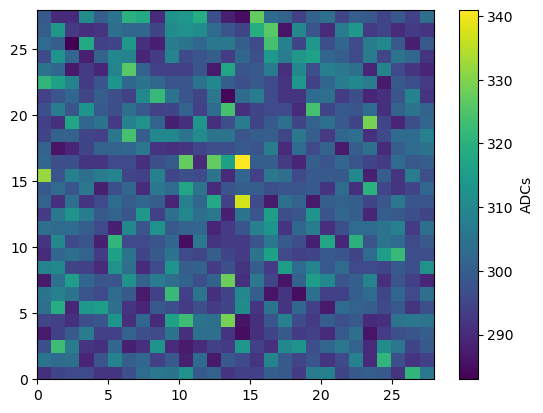

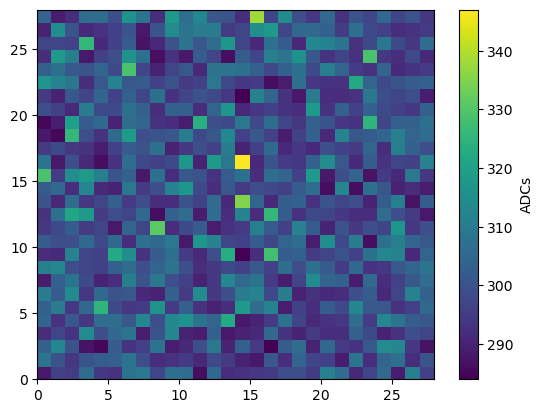

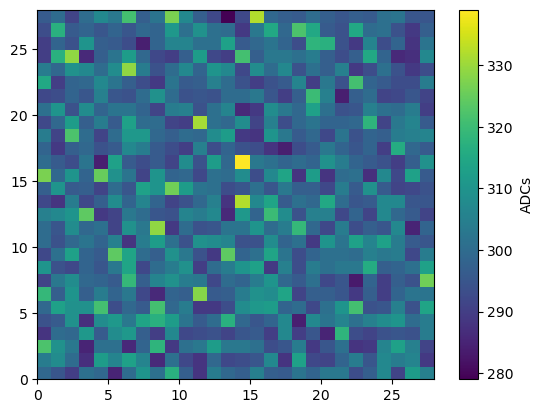

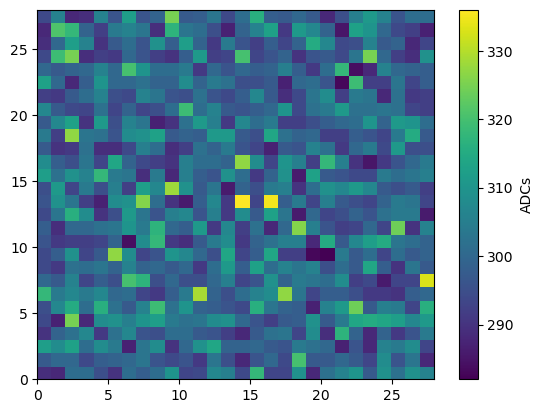

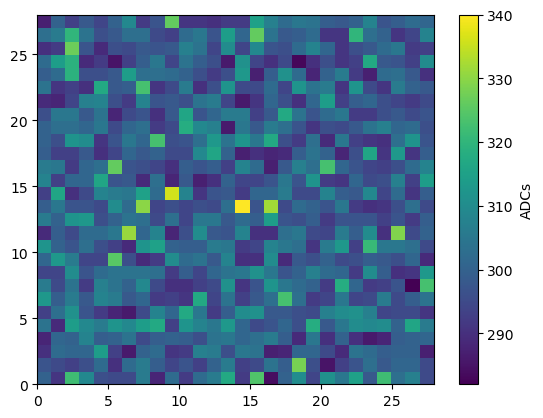

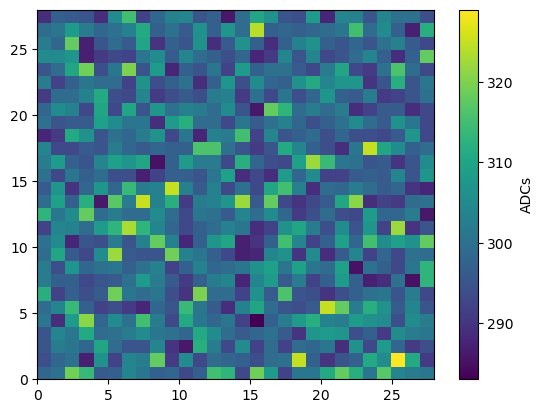

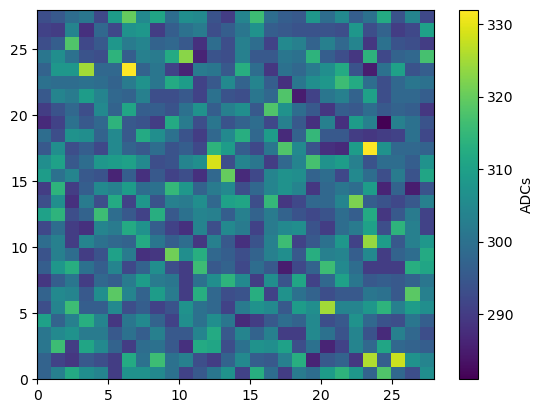

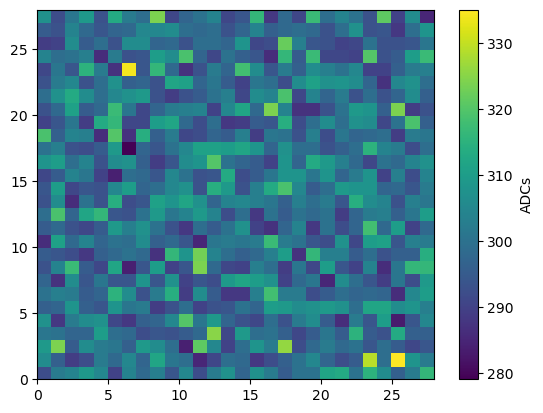

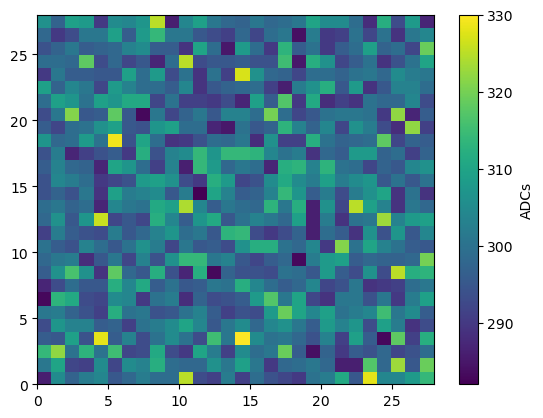

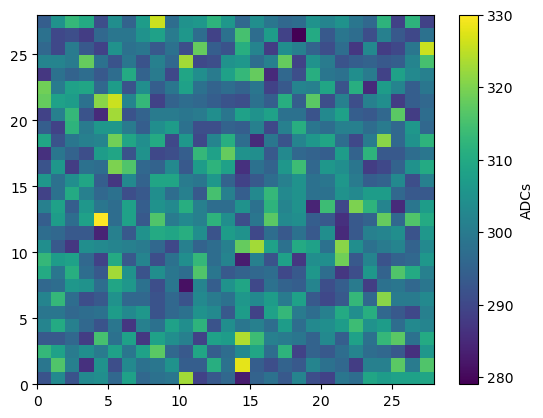

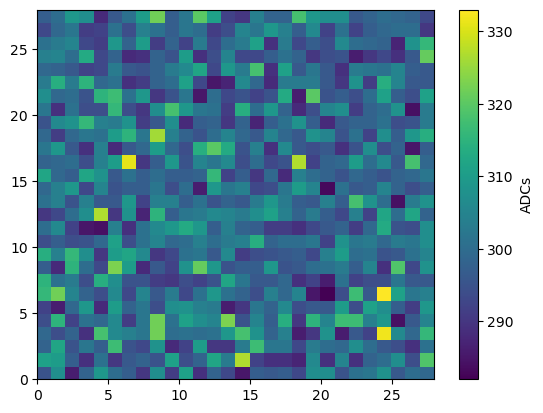

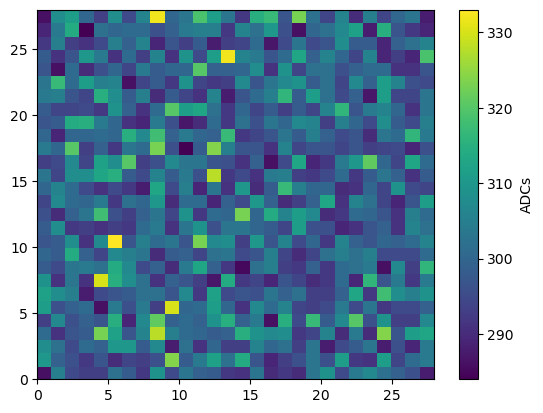

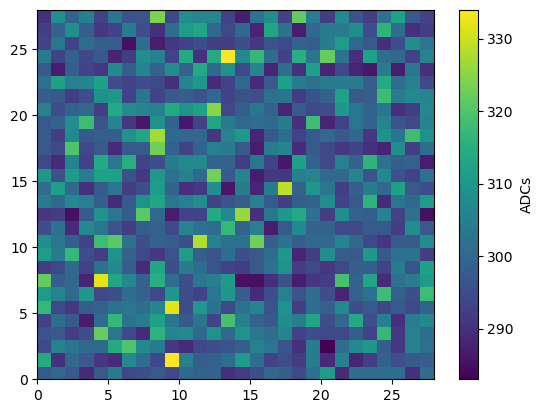

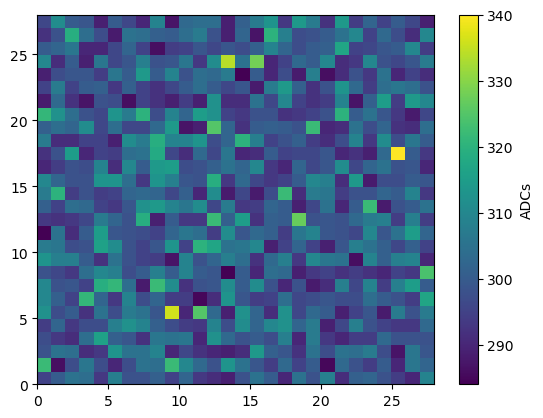

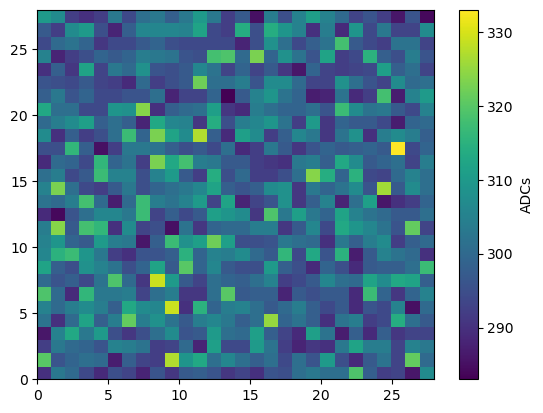

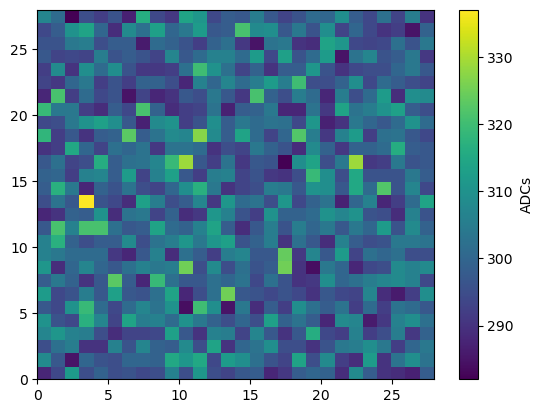

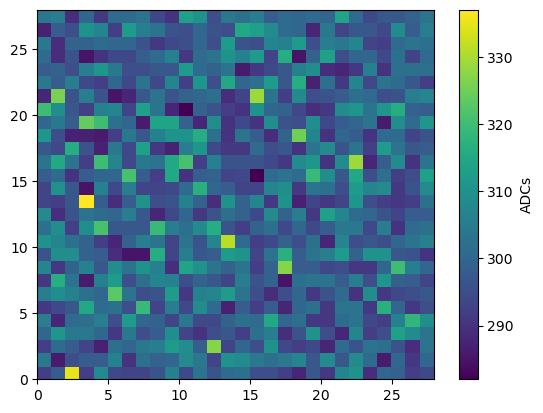

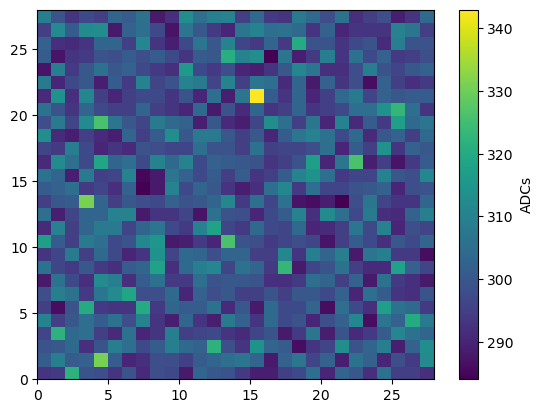

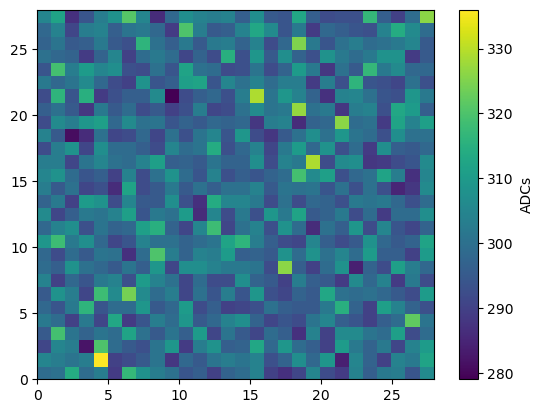

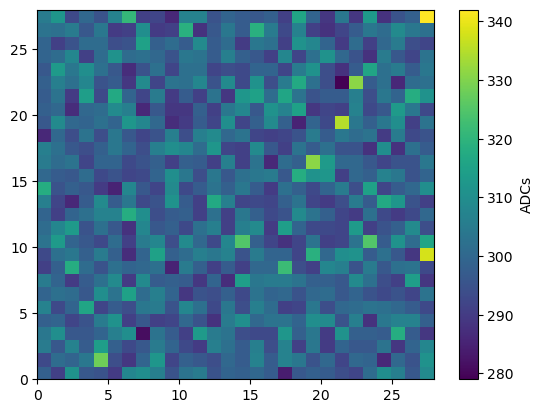

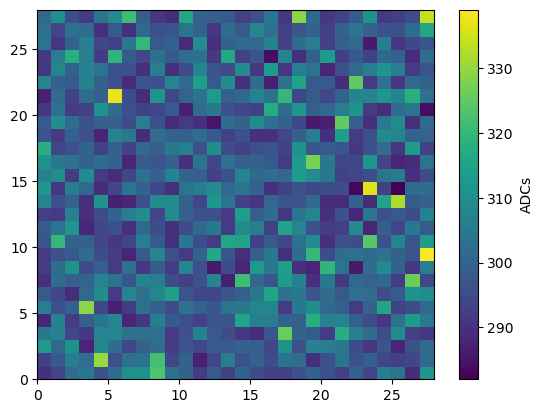

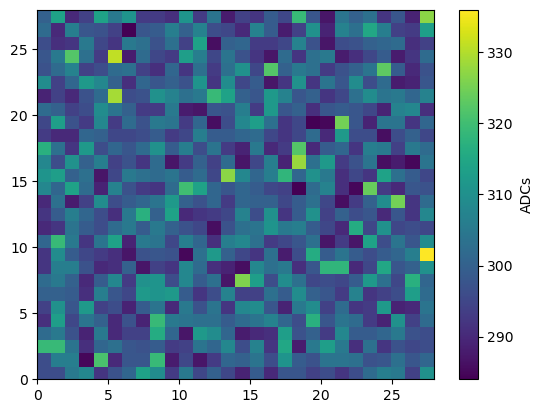

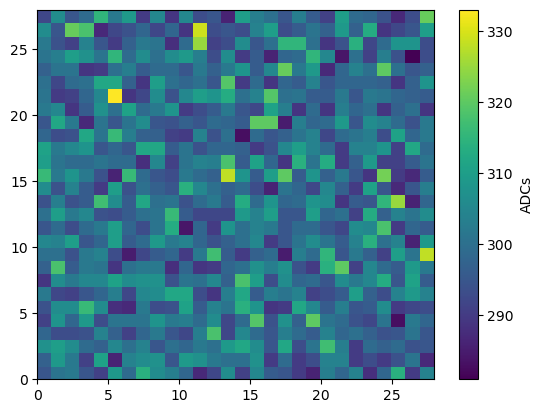

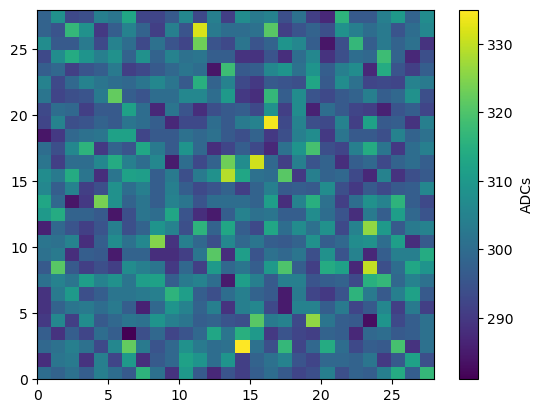

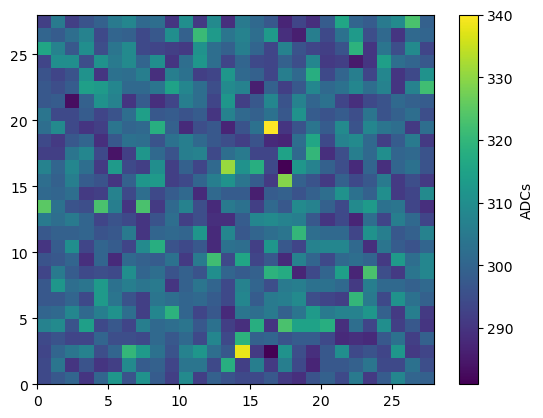

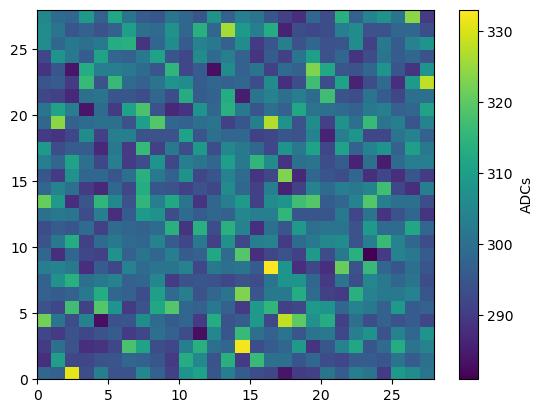

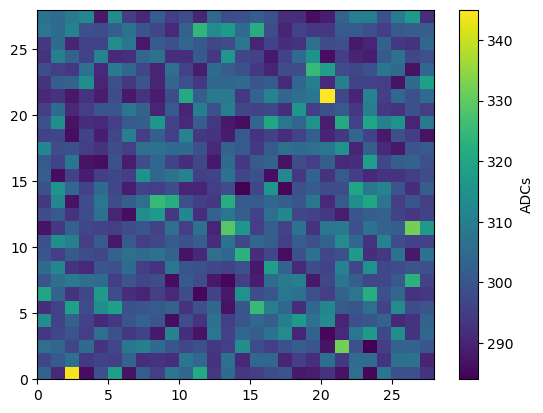

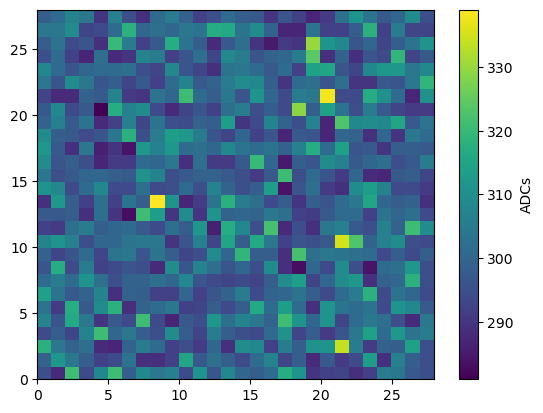

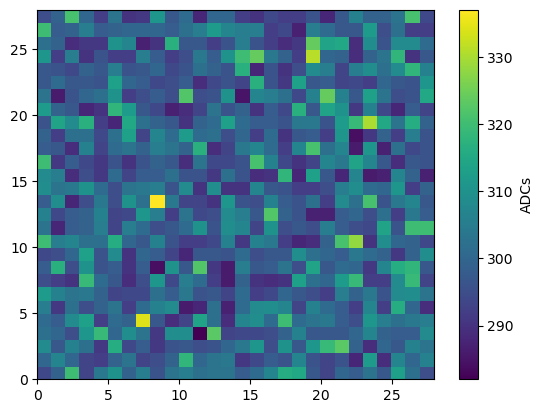

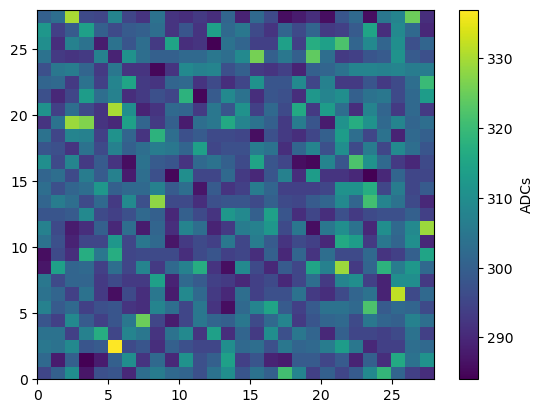

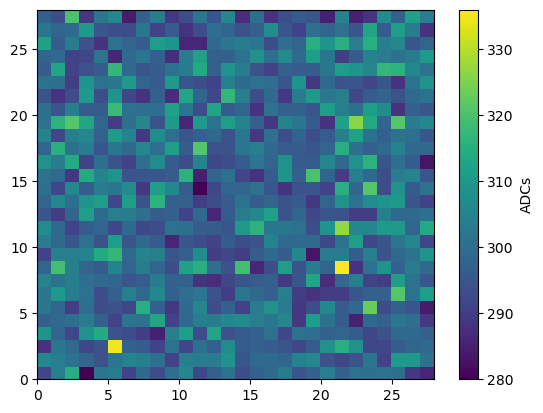

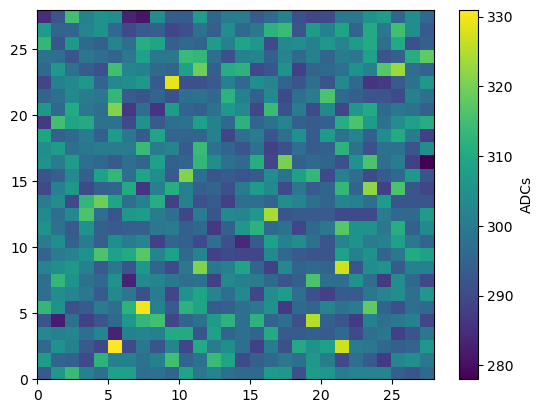

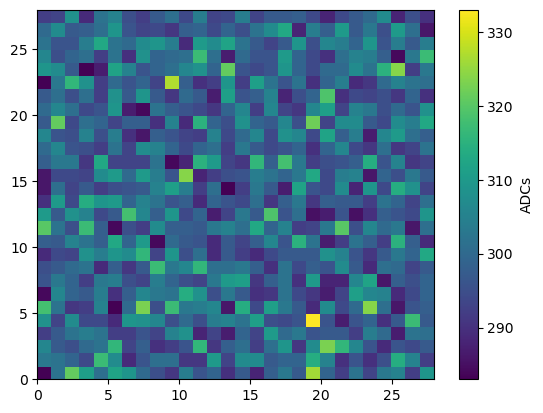

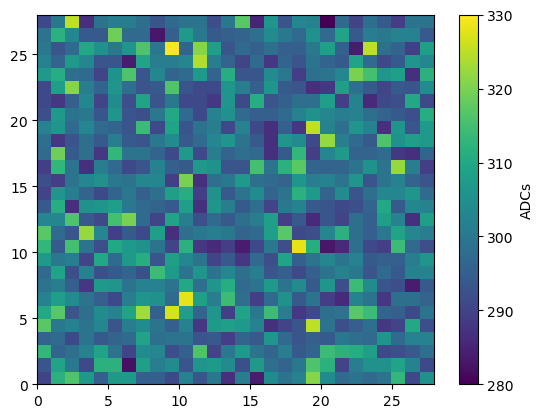

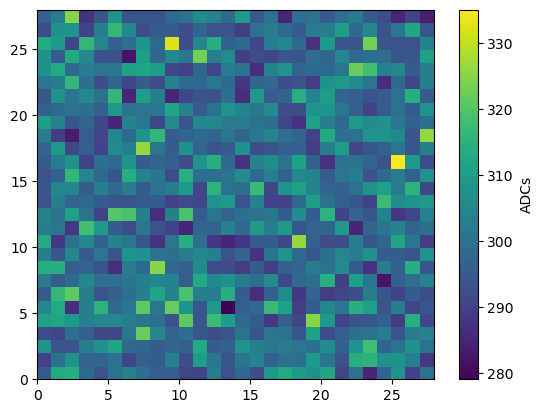

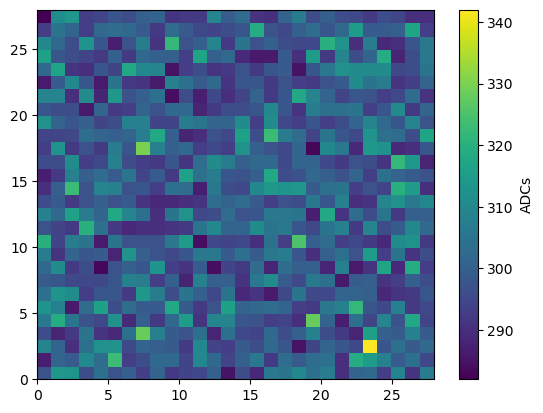

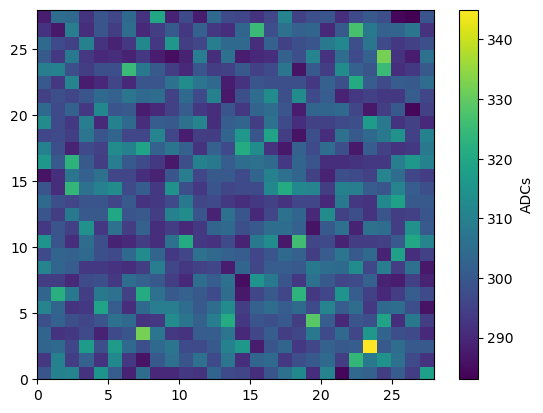

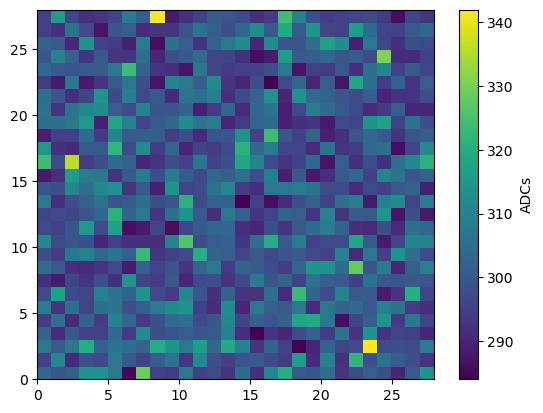

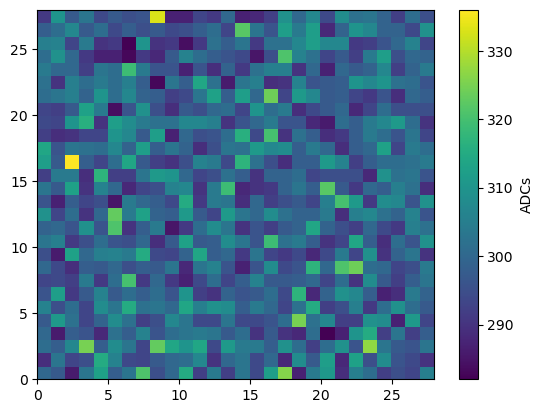

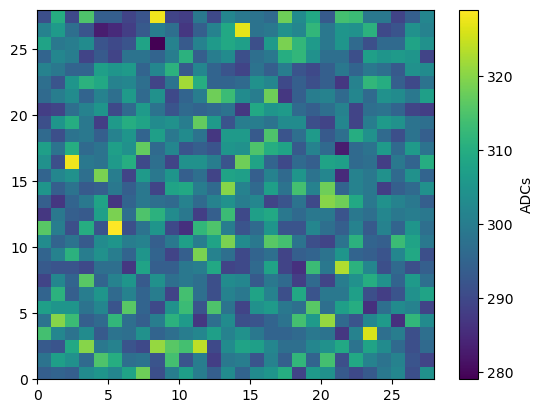

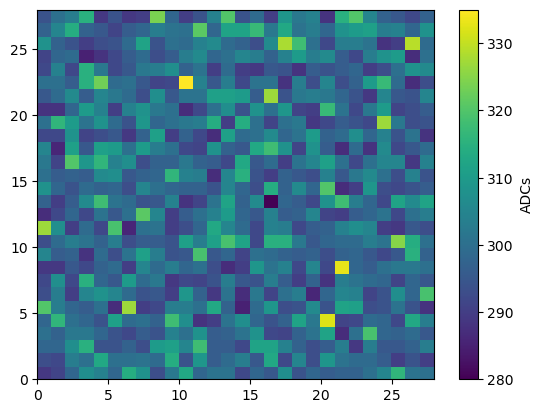

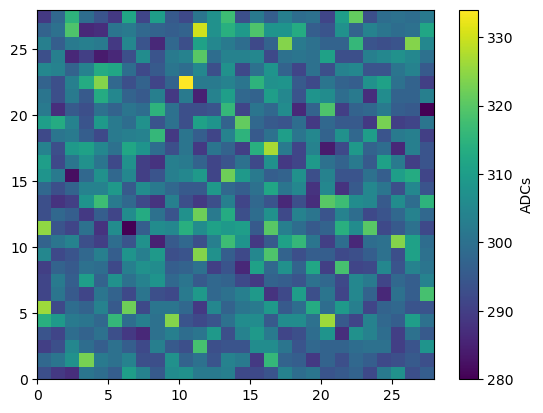

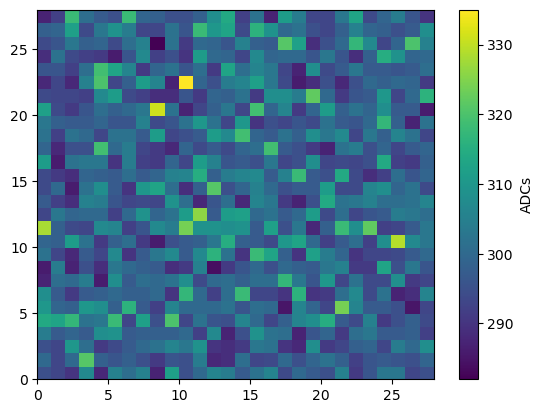

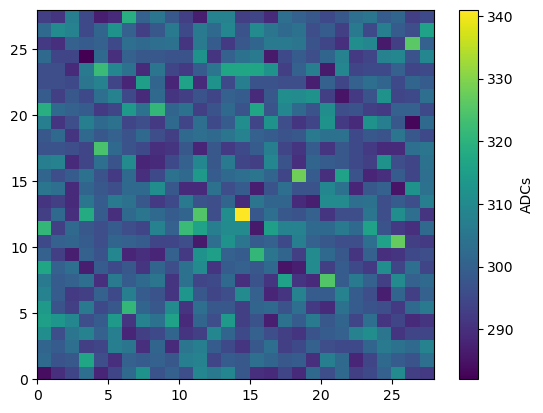

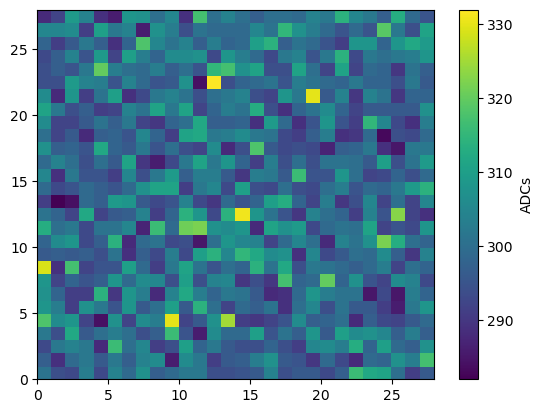

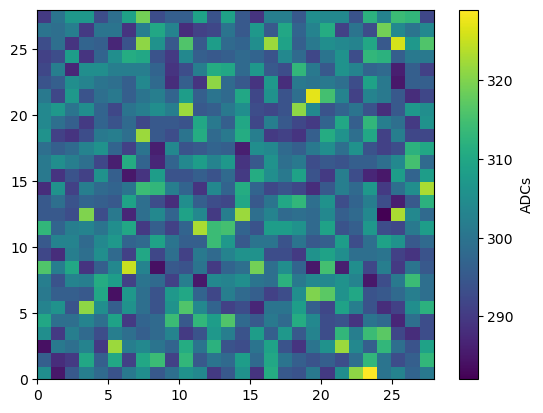

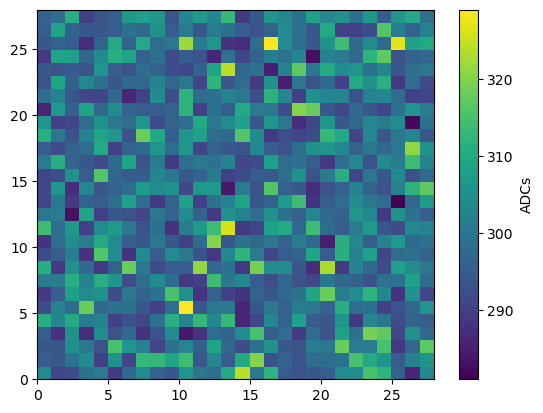

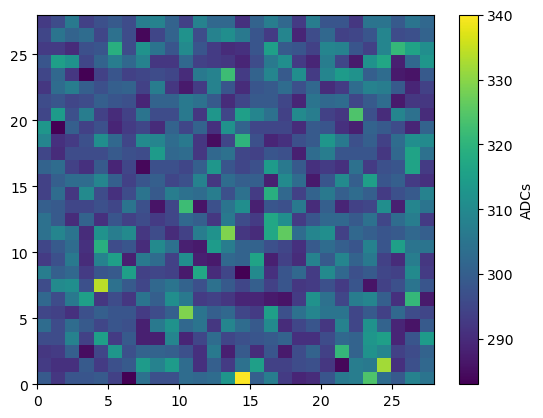

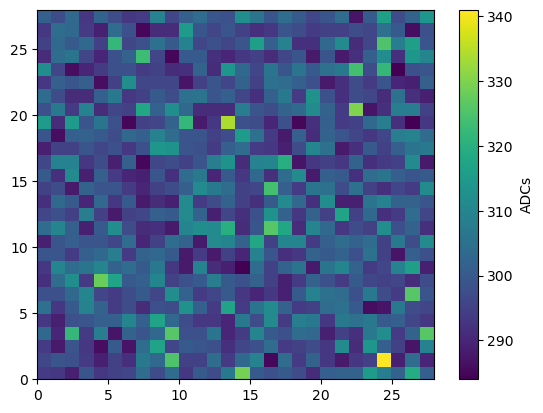

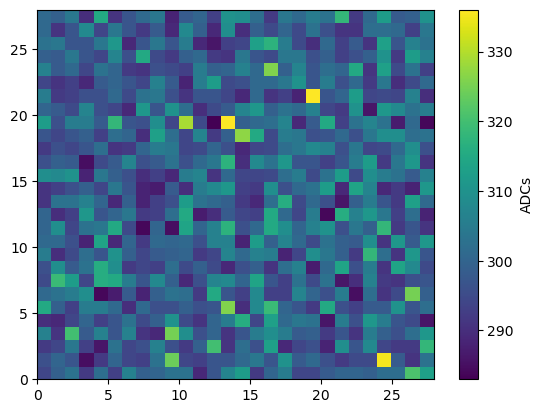

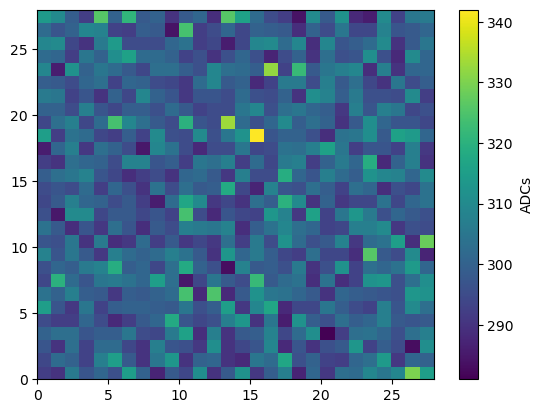

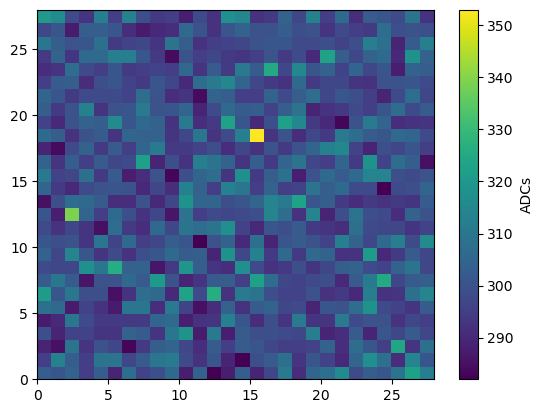

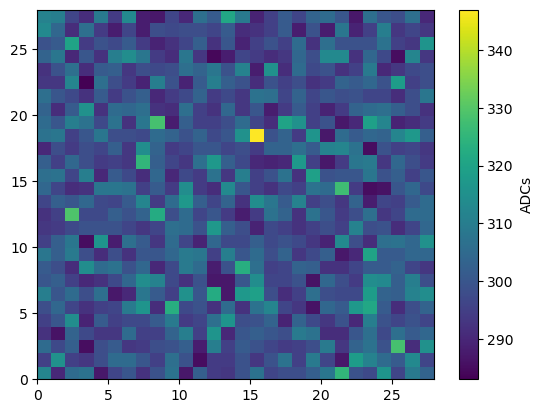

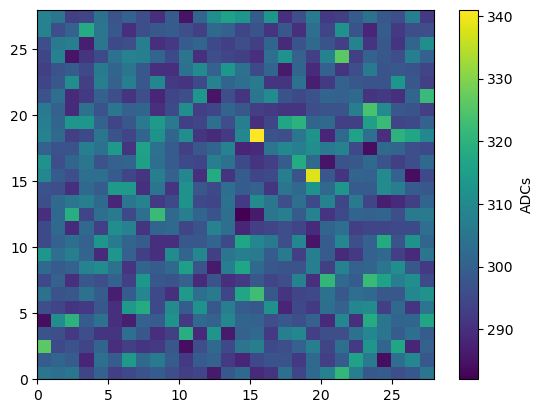

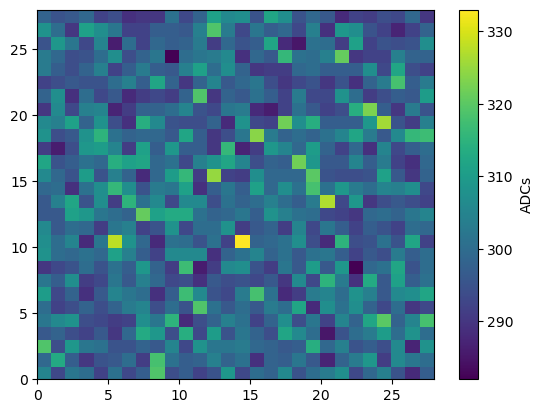

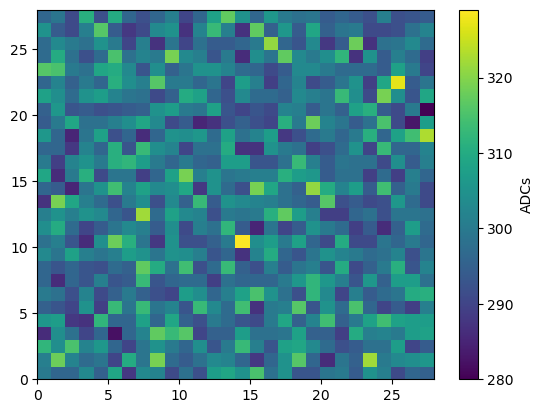

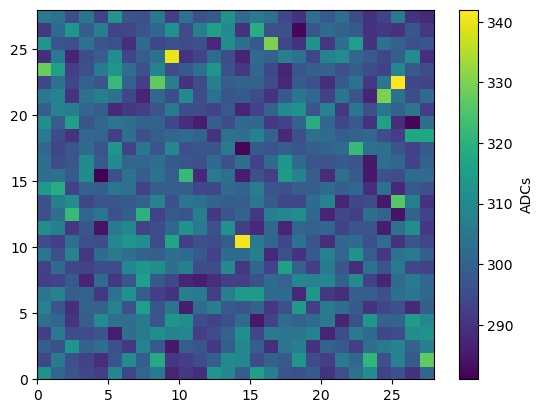

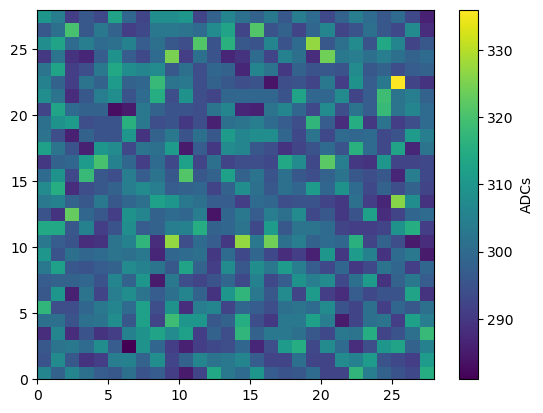

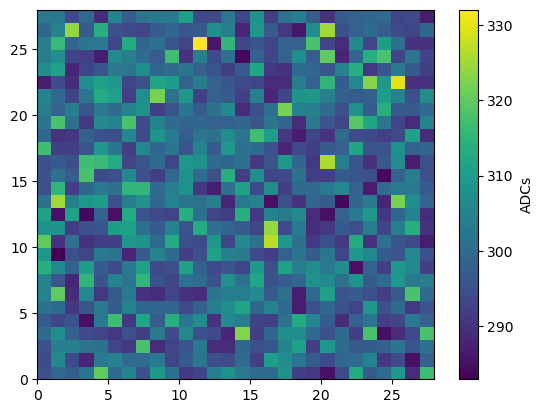

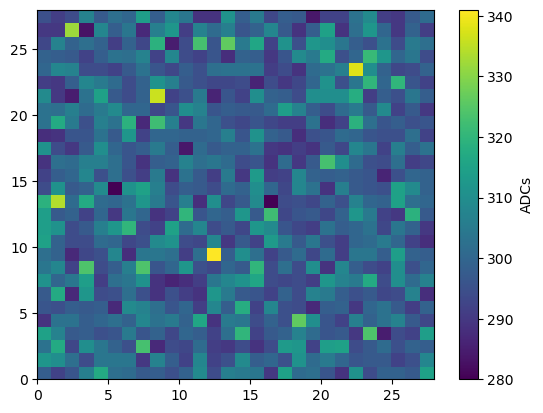

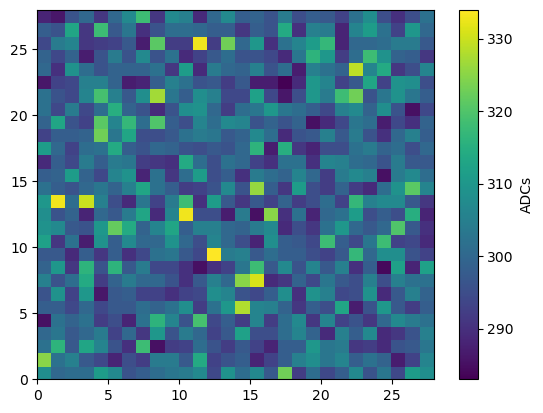

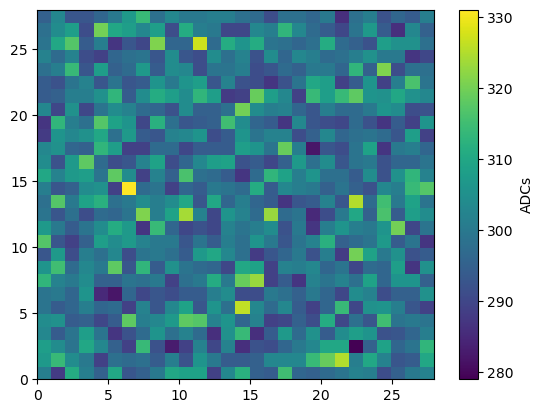

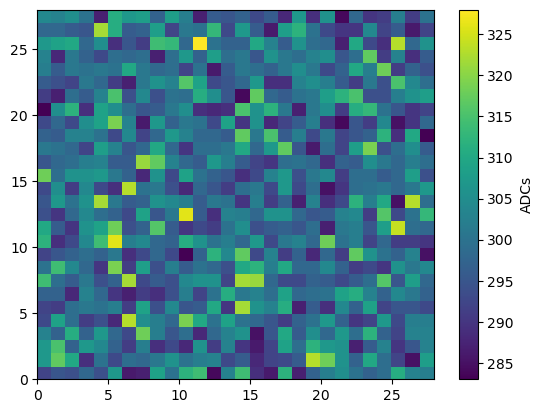

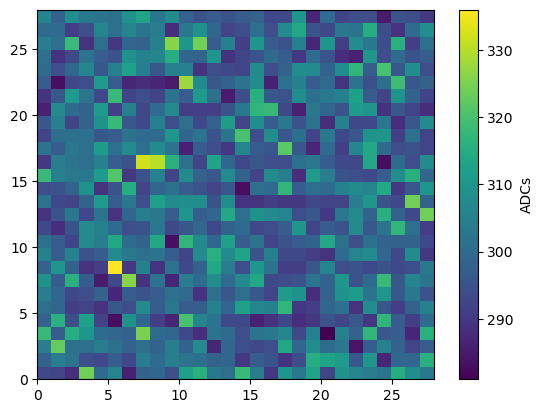

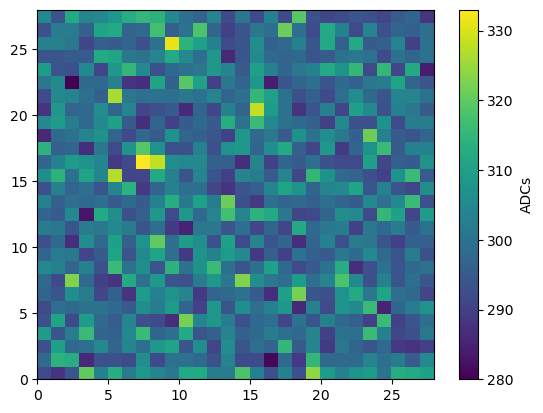

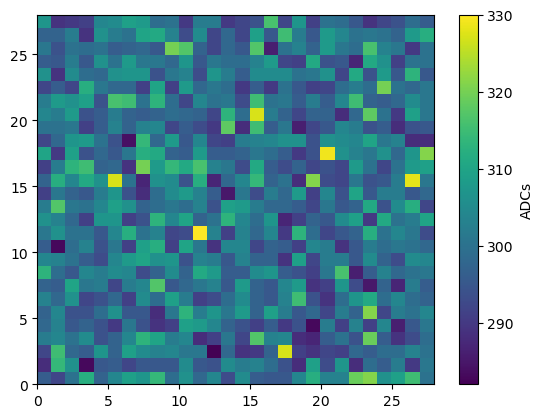

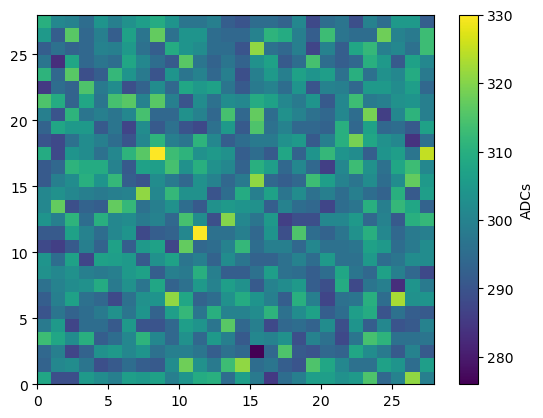

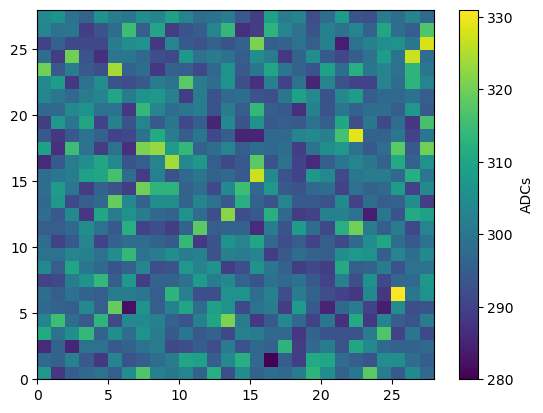

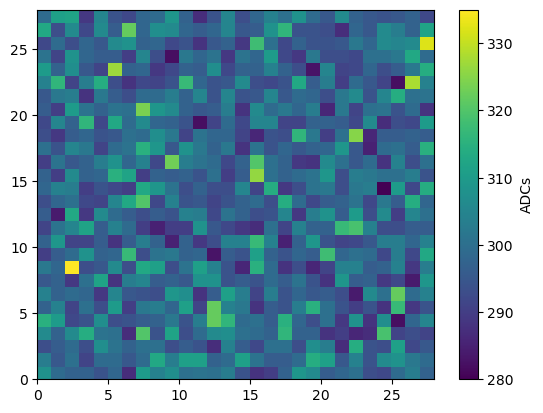

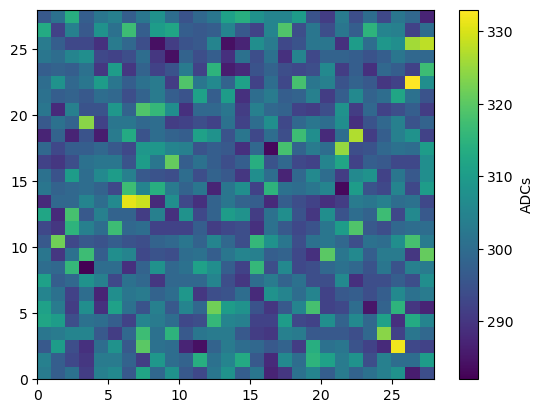

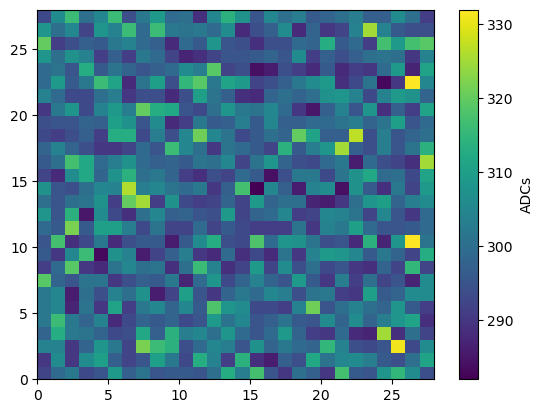

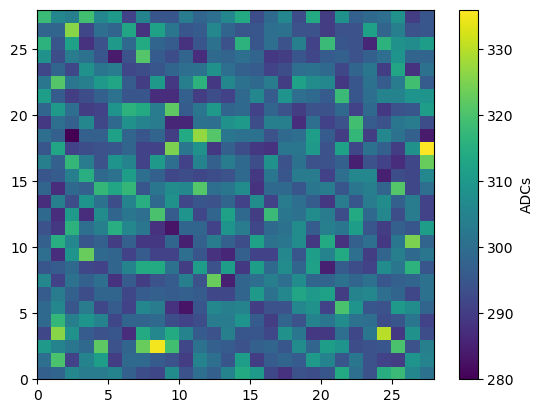

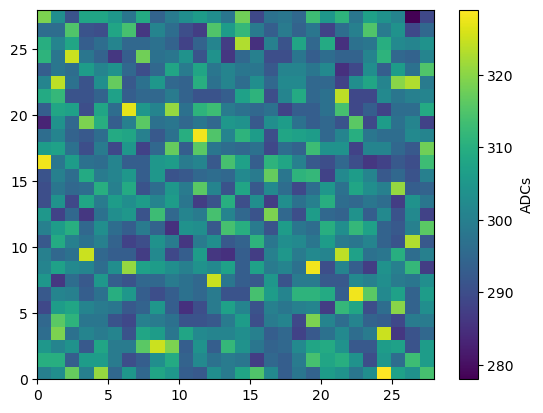

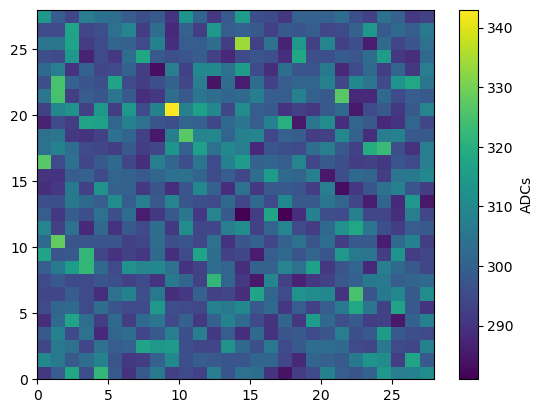

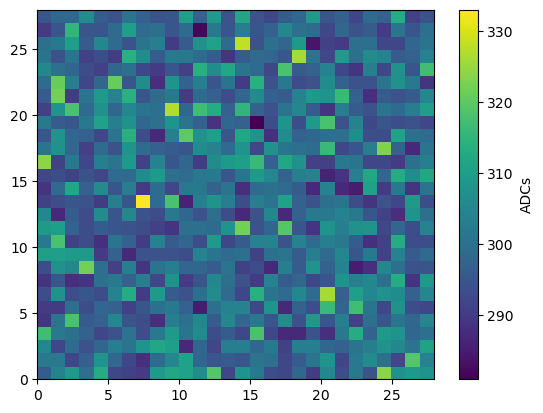

In [13]:
for i in range (0,75):
    plt.figure()
    plt.pcolor(waveform[:,:,i],cmap='viridis')
    plt.colorbar(label="ADCs")
    plt.show()
    plt.close()

In [14]:
reader.trigger_settings["trigger_patches"][0]

{'x': np.int64(14), 'y': np.int64(14)}

# try balanced patches

In [53]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "all_patches",
                              hot_pixel_from_simulation = False,
                              interleave_patches = True,
                              number_of_trigger_patches = 7,
                              sequence_length = 10,
                              nsb_threshold = 0,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

In [51]:

%timeit batch = reader.generate_mono_batch(batch_indices=list(range(100)))


19.8 s ± 451 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
len(batch)

102

 Without interleave on 40 events: 7.56 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each), 100 events 19.8 s ± 451 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
 
 With interleave on 40 events: 7.76 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each), 100 events: 20 s ± 395 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

 Processing 102 patches in 40 events, 110 in 100 events

In [54]:
reader.generate_mono_batch(batch_indices=list(range(100)))

<Table length=110>
index file_index table_index ... patch_index   patch_waveform  cherenkov_pe
                             ...                                           
int64   int64       int64    ...    int64    float32[28,28,10]    int64    
----- ---------- ----------- ... ----------- ----------------- ------------
    1          0           1 ...          26    291.0 .. 299.0           21
    1          0           1 ...          44      293.0 .. 0.0            0
    1          0           1 ...          27      299.0 .. 0.0            5
    1          0           1 ...          13        0.0 .. 0.0            0
    1          0           1 ...           1      0.0 .. 293.0           14
    1          0           1 ...           6        0.0 .. 0.0            0
    1          0           1 ...          39      290.0 .. 0.0           14
    1          0           1 ...          36      0.0 .. 294.0            0
    1          0           1 ...          32    293.0 .. 297.0           31
  ...        ...         ... ...         ...               ...          ...
    5          0           5 ...           8      0.0 .. 309.0            0
   90          0          90 ...          37    297.0 .. 291.0            2
   90          0          90 ...          15      0.0 .. 285.0            0
   90          0          90 ...          45      302.0 .. 0.0            2
   90          0          90 ...          33      289.0 .. 0.0            0
   90          0          90 ...          44      304.0 .. 0.0            2
   90          0          90 ...          35      0.0 .. 302.0            0
   90          0          90 ...          38    299.0 .. 296.0            2
   90          0          90 ...          31    299.0 .. 301.0            0

In [16]:
reader.example_identifiers

<Table length=10000>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
    0          0           0 ...  0.7451261090651803                         1
    1          0           1 ...  0.7451261090651803                         1
    2          0           2 ...  0.7451261090651803                         1
    3          0           3 ...  0.7451261090651803                         1
    4          0           4 ...  0.7451261090651803                         1
    5          0           5 ...  0.7451261090651803                         1
    6          0           6 ...  0.7451261090651803                         1
    7          0           7 ...  0.7451261090651803                         1
    8          0           8 ...  0.7451261090651803                         1
  ...        ...         ... ...                 ...                       ...
 9991          0        9991 ... -1.3891137347666962                         1
 9992          0        9992 ... -1.3891137347666962                         1
 9993          0        9993 ... -1.3891137347666962                         1
 9994          0        9994 ... -1.3891137347666962                         1
 9995          0        9995 ... -1.3891137347666962                         1
 9996          0        9996 ... -1.3891137347666962                         1
 9997          0        9997 ... -1.3891137347666962                         1
 9998          0        9998 ... -1.3891137347666962                         1
 9999          0        9999 ... -1.3891137347666962                         1

In [17]:
reader.generate_mono_batch(batch_indices=[0,1,2,3])

<Table length=56>
index file_index table_index ... patch_index   patch_waveform  cherenkov_pe
                             ...                                           
int64   int64       int64    ...    int64    float32[28,28,10]    int64    
----- ---------- ----------- ... ----------- ----------------- ------------
    1          0           1 ...          27      299.0 .. 0.0            5
    1          0           1 ...           7      0.0 .. 300.0           30
    1          0           1 ...          24    299.0 .. 304.0           39
    1          0           1 ...           0      0.0 .. 299.0            9
    1          0           1 ...          34      299.0 .. 0.0            7
    1          0           1 ...          14      0.0 .. 301.0           25
    1          0           1 ...          19    304.0 .. 300.0            3
    1          0           1 ...          23    323.0 .. 311.0           43
    1          0           1 ...          21      0.0 .. 295.0            9
  ...        ...         ... ...         ...               ...          ...
    3          0           3 ...          17    303.0 .. 300.0            0
    3          0           3 ...          33      301.0 .. 0.0            0
    3          0           3 ...           0      0.0 .. 301.0            0
    3          0           3 ...          47      301.0 .. 0.0            0
    3          0           3 ...          22    297.0 .. 304.0            0
    3          0           3 ...          42        0.0 .. 0.0            0
    3          0           3 ...           6        0.0 .. 0.0            0
    3          0           3 ...          21      0.0 .. 299.0            0
    3          0           3 ...          23    304.0 .. 298.0            0

In [18]:
%%timeit
reader = DLRawTriggerReader(
    input_url_signal=[
        "/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5",
    ],
    image_mapper_type="ShiftingMapper",
    mode="mono",
    sequence_position="maximum",
    output_settings="all_patches",
    hot_pixel_from_simulation=True,
    number_of_trigger_patches=7,
    sequence_length=10,
    nsb_threshold=0,
    allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
    allowed_tels=[1],
    quality_cuts=False,
)


1.1 s ± 7.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


    %%timeit
    reader = DLRawTriggerReader(
        input_url_signal=[
            "/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5",
        ],
        image_mapper_type="ShiftingMapper",
        mode="mono",
        sequence_position="maximum",
        output_settings="all_patches",
        hot_pixel_from_simulation=True,
        number_of_trigger_patches=7,
        sequence_length=10,
        nsb_threshold=0,
        allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
        allowed_tels=[1],
        quality_cuts=False,
    )

    With all the code in the get_balanced patches: 1.09 s ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [22]:
import time
start_time = time.time()
batch = reader.generate_mono_batch(batch_indices=list(range(10000)))
end_time = time.time()

print(f"Execution Time: {end_time - start_time:.4f} seconds")

KeyboardInterrupt: 

In [ ]:
len(batch)

In [ ]:
(end_time - start_time)/60

    %timeit batch = reader.generate_mono_batch(batch_indices=list(range(50)))

    With all the code in the get_balanced patches: 9.88 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each. 102 lines

    Con todos los patches 34.8 mins


With the code in get balanced patches we the would need to process all the examples and a function that just get 20 or 30 examples to have constant batches

In [ ]:
reader.generate_mono_batch(batch_indices=list(range(4)))[-24:]

In [ ]:
batch = reader.generate_mono_batch(batch_indices=[0,1,2,3])

waveform = batch['patch_waveform'][:28]
for i in range(28):

    plt.figure()
    print(f"event: {batch["event_id"][i]}, index: {batch['patch_index'][i]}, chkovs: {batch['cherenkov_pe'][i]}")
    plt.pcolor(waveform[i][:,:,3],cmap='viridis')
    plt.colorbar(label="ADCs")
    plt.show()
    plt.close()

# Try with the gamma file

## waveform

In [31]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          sequence_length = 10,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          #output_settings= "waveform",
                          allowed_tels = [1],
                          quality_cuts = False)

In [27]:
reader.generate_mono_batch(batch_indices=[10,11,12,13,14,15,16,17,18])

<Table length=9>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
   10          0          10 ... -1.0579509455393845                         1
   11          0          11 ... -1.0579509455393845                         1
   12          0          12 ... -1.8760415152887013                         1
   13          0          13 ... -1.4123167590691665                         1
   14          0          14 ... -1.6176147278908277                         1
   15          0          15 ... 0.48964242629100024                         1
   16          0          16 ... 0.48964242629100024                         1
   17          0          17 ... 0.48964242629100024                         1
   18          0          18 ... 0.48964242629100024                         1

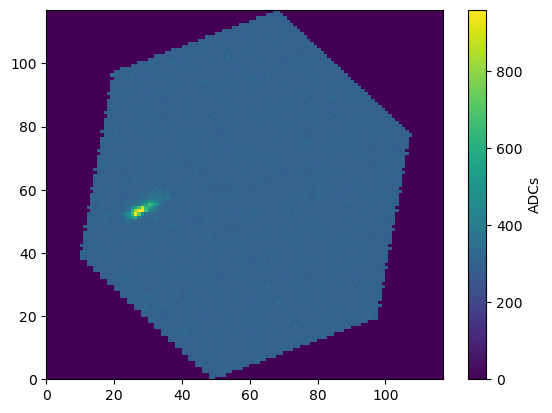

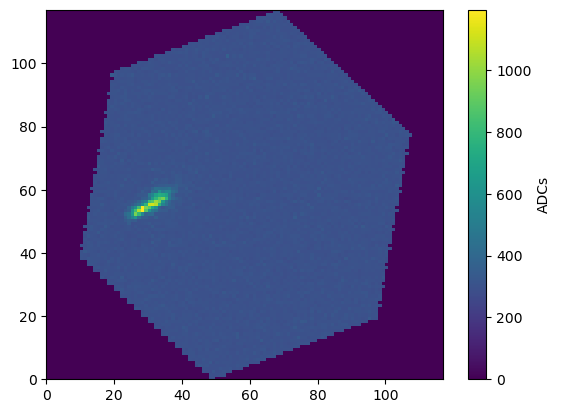

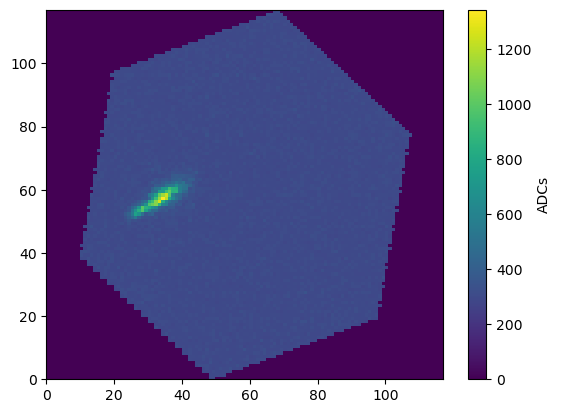

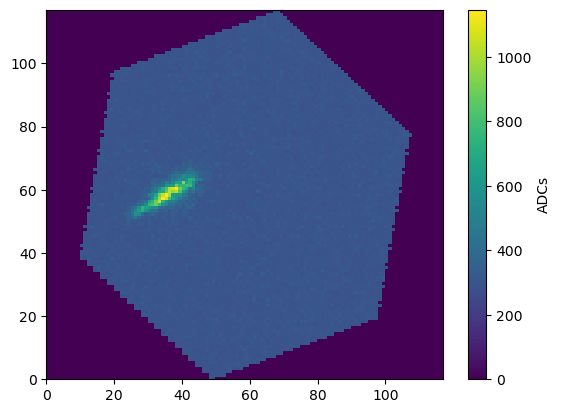

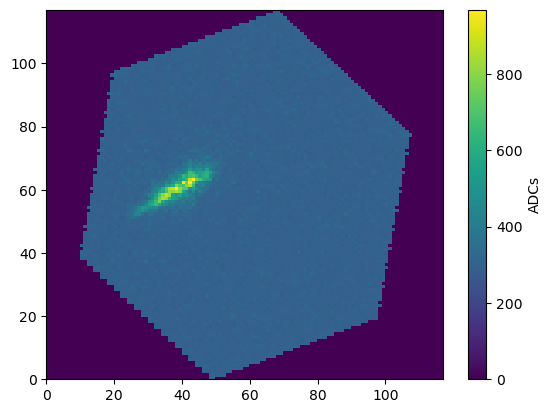

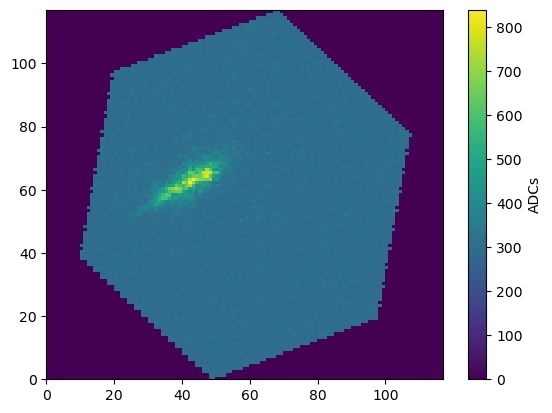

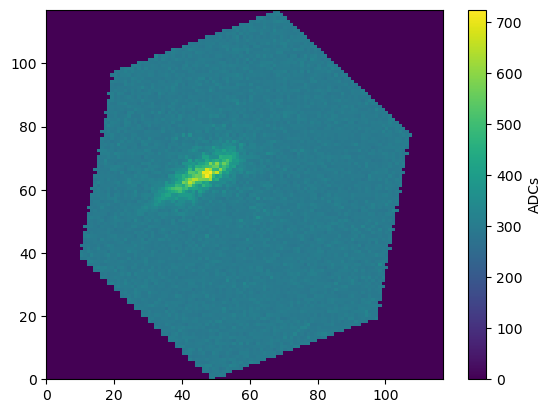

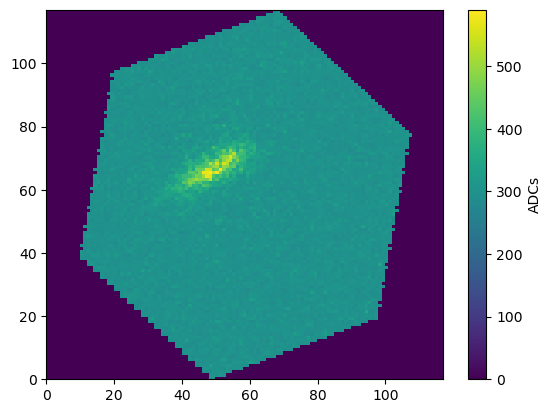

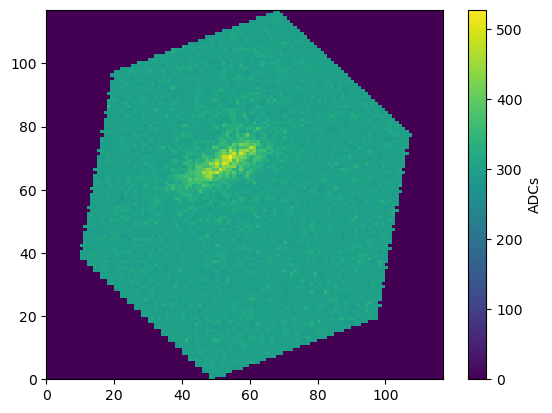

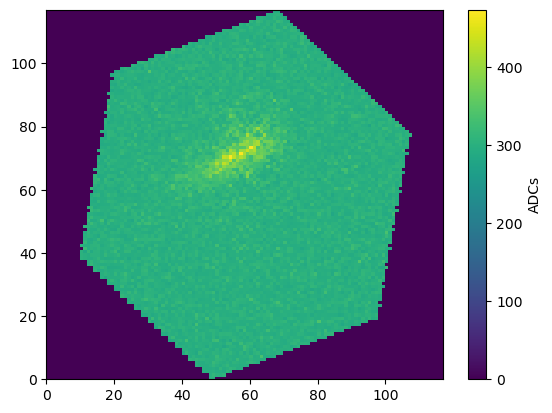

In [32]:
waveform = reader.generate_mono_batch(batch_indices=[10,11,12,13,14,15,16,17,18])['features'][6]
for i in range(10):
    plt.figure()
    plt.pcolor(waveform[:,:,i],cmap='viridis')
    plt.colorbar(label="ADCs")
    plt.show()
    plt.close()

Table /r1/event/telescope/tel_001 is missing column first_cell_id for field first_cell_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column module_hires_local_clock_counter for field module_hires_local_clock_counter of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column pedestal_intensity for field pedestal_intensity of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column calibration_monitoring_id for field calibration_monitoring_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.


Event index: 502
True cherenkov p.e.: 74


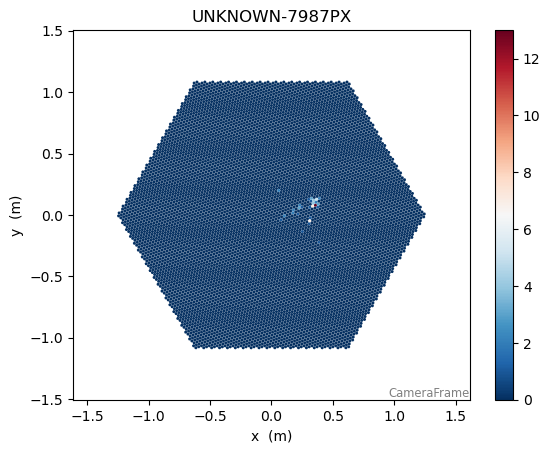

Event index: 1903
True cherenkov p.e.: 53


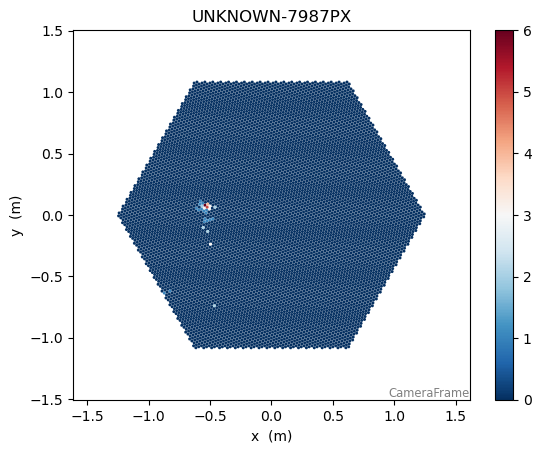

Event index: 3101
True cherenkov p.e.: 43


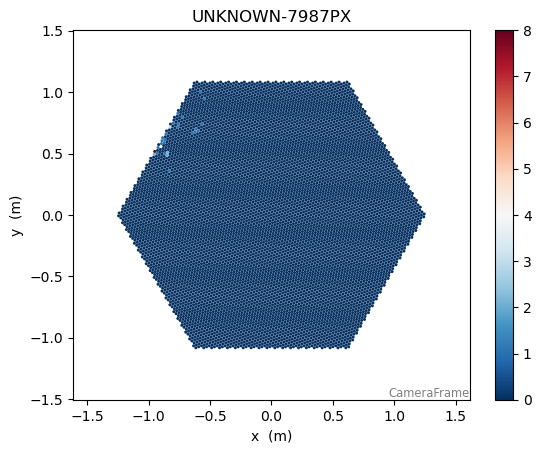

Event index: 3305
True cherenkov p.e.: 44


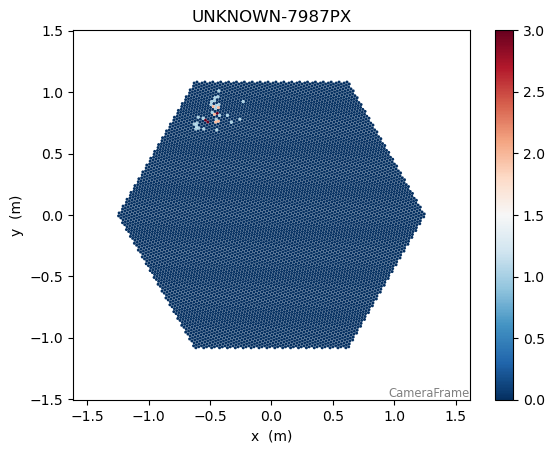

Event index: 3307
True cherenkov p.e.: 37


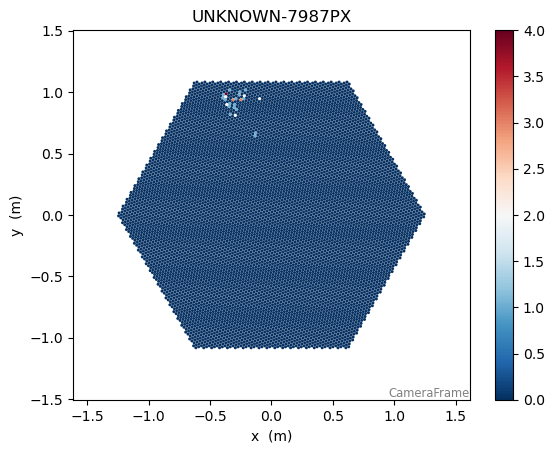

Event index: 3700
True cherenkov p.e.: 233


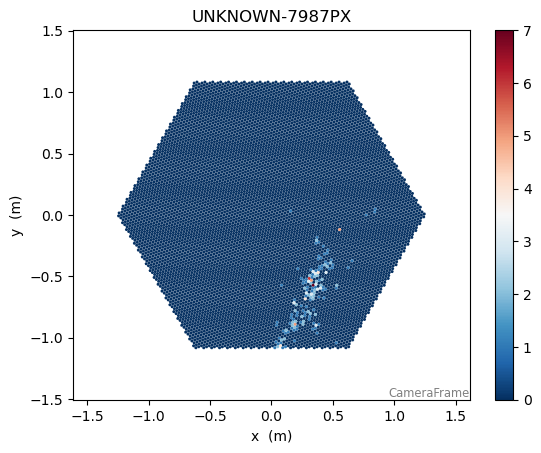

Event index: 3701
True cherenkov p.e.: 184


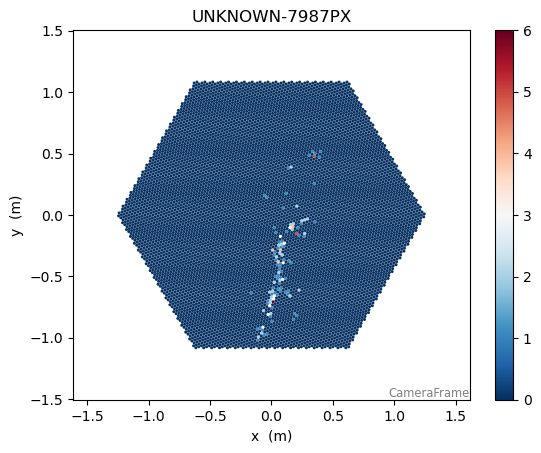

Event index: 5900
True cherenkov p.e.: 20


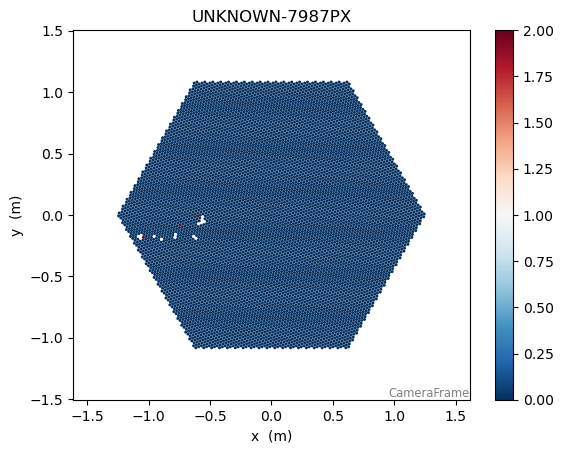

Event index: 5909
True cherenkov p.e.: 39


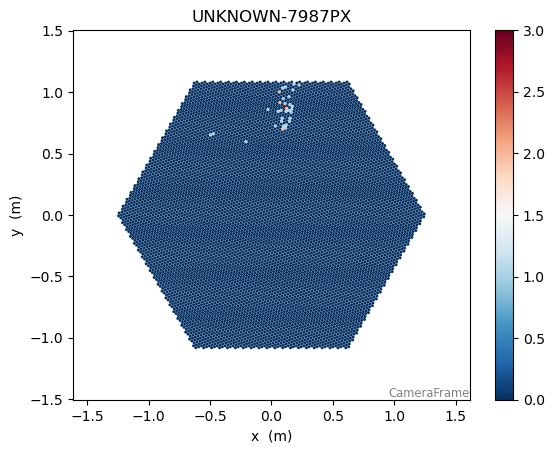

Event index: 6403
True cherenkov p.e.: 36


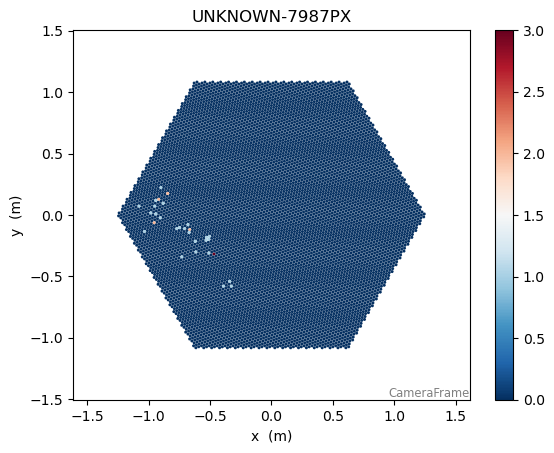

In [24]:
source = EventSource("/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5")
camgeo = source.subarray.tel[1].camera.geometry
for event in source:
    if event.count < 10:
        print(f"Event index: {event.index.event_id}")
        print(f"True cherenkov p.e.: {event.simulation.tel[1].true_image_sum}")
        disp = CameraDisplay(source.subarray.tel[1].camera.geometry)
        #disp.image = event.dl1.tel[1].image
        disp.image = event.simulation.tel[1].true_image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        plt.show()
    else: break

## Random patch

In [67]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "random_patch",
                          number_of_trigger_patches = 7,
                          sequence_length = 10,
                          nsb_threshold = 0,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)

In [70]:
reader.example_identifiers

<Table length=11044>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           0 ...  -1.9925999642324606                         1
    1          0           1 ...  -1.4897898175306203                         1
    2          0           2 ... -0.42745453697254265                         1
    3          0           3 ...   -1.800087774779224                         1
    4          0           4 ...   -1.800087774779224                         1
    5          0           5 ...  -0.8830110313976508                         1
    6          0           6 ...  -0.8830110313976508                         1
    7          0           7 ...   -1.481803772036002                         1
    8          0           8 ...   -1.481803772036002                         1
  ...        ...         ... ...                  ...                       ...
11035          0       11035 ...  -1.0322380973735295                         1
11036          0       11036 ...  -2.2933470950976123                         1
11037          0       11037 ...  -1.7009575415831506                         1
11038          0       11038 ...  -1.7009575415831506                         1
11039          0       11039 ...  -1.3769667552339369                         1
11040          0       11040 ...  -1.3769667552339369                         1
11041          0       11041 ...  -0.8095704438545192                         1
11042          0       11042 ...  -0.8095704438545192                         1
11043          0       11043 ...   -0.869229201033562                         1

In [65]:
batch = reader.generate_mono_batch(batch_indices=[10,11,12,13,14,15,16,17,18])
batch

True
False
False
False
True
True
False
True
True


<Table length=9>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
   10          0          10 ... -1.0579509455393845                         1
   11          0          11 ... -1.0579509455393845                         1
   12          0          12 ... -1.8760415152887013                         1
   13          0          13 ... -1.4123167590691665                         1
   14          0          14 ... -1.6176147278908277                         1
   15          0          15 ... 0.48964242629100024                         1
   16          0          16 ... 0.48964242629100024                         1
   17          0          17 ... 0.48964242629100024                         1
   18          0          18 ... 0.48964242629100024                         1

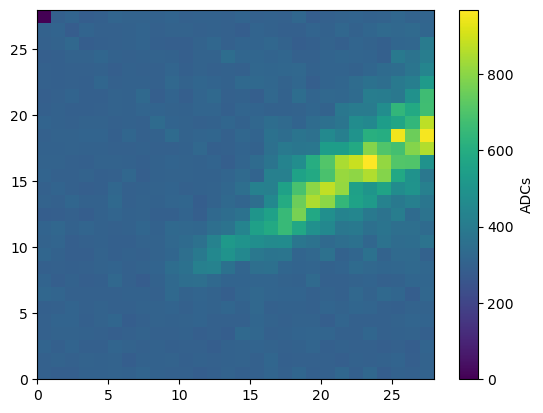

In [66]:

waveform = batch['features'][6]

plt.figure()
plt.pcolor(waveform[:,:,4],cmap='viridis')
plt.colorbar(label="ADCs")
plt.show()
plt.close()

## Balanced patches

In [56]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "all_patches",
                              hot_pixel_from_simulation = False,
                              interleave_patches = True,
                              number_of_trigger_patches = 7,
                              sequence_length = 10,
                              nsb_threshold = 0,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

In [57]:
reader.generate_mono_batch(batch_indices=[10,11,12,13,14,15,16,17,18])

<Table length=160>
index file_index table_index ... patch_index   patch_waveform  cherenkov_pe
                             ...                                           
int64   int64       int64    ...    int64    float32[28,28,10]    int64    
----- ---------- ----------- ... ----------- ----------------- ------------
   10          0          10 ...          42        0.0 .. 0.0            4
   10          0          10 ...          19    300.0 .. 300.0            0
   10          0          10 ...          39      303.0 .. 0.0           15
   10          0          10 ...          40      295.0 .. 0.0            0
   10          0          10 ...          43        0.0 .. 0.0           67
   10          0          10 ...          34      297.0 .. 0.0            0
   10          0          10 ...          44      291.0 .. 0.0          150
   10          0          10 ...          10    288.0 .. 297.0            0
   10          0          10 ...          30    304.0 .. 311.0            3
  ...        ...         ... ...         ...               ...          ...
   18          0          18 ...          31    289.0 .. 318.0            0
   18          0          18 ...          19    299.0 .. 296.0           72
   18          0          18 ...          35      0.0 .. 312.0            0
   18          0          18 ...          20      294.0 .. 0.0           80
   18          0          18 ...          39      293.0 .. 0.0            0
   18          0          18 ...          26    293.0 .. 291.0           71
   18          0          18 ...          34      313.0 .. 0.0            0
   18          0          18 ...          27      299.0 .. 0.0           81
   18          0          18 ...           9      0.0 .. 297.0            0

# Verify the data 

In [ ]:
source = EventSource("/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5")
# event.simulation.tel[1].true_image.shape

In [ ]:
camgeo = source.subarray.tel[1].camera.geometry
for event in source:
    if event.count < 10:
        print(f"Event index: {event.index.event_id}")
        print(f"True cherenkov p.e.: {event.simulation.tel[1].true_image_sum}")
        disp = CameraDisplay(source.subarray.tel[1].camera.geometry)
        #disp.image = event.dl1.tel[1].image
        disp.image = event.simulation.tel[1].true_image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        plt.show()
    else: break

In [ ]:
for event in source:

        print(distance(event))

In [ ]:
chkov = []
for event in source:
    chkov.append(event.simulation.tel[1].true_image_sum)

plt.hist(chkov, bins=50, edgecolor="black")
plt.xlabel("Detected Cherenkov p.e.")
plt.ylabel("Counts")
plt.title("Cherenkov p.e.")
plt.show()

In [ ]:
event.simulation.shower.keys()
event.simulation.shower.core_x

In [ ]:

def distance(event):
    x = event.simulation.shower.core_x
    y = event.simulation.shower.core_y
    d = np.sqrt(x**2+y**2)
    return d
    

In [ ]:
far = 0
near = 0
distances = []
for event in source:
    d = distance(event).to_value()
    if d >= 300:
        far+=1
    else:
        near+=1
    distances.append(d)

print(f"{far} events further than 300 m")
print(f"{near} events nearer than 300 m")

plt.hist(distances, bins=50, edgecolor="black")
plt.xlabel("Distance (m)")
plt.ylabel("Frequency")
plt.title("Histogram of Distances")
plt.show()